Numerical target data analysis::
read of file::To undentify the best fitted model for identifying bodyfat value by considering other dependent variables.

In [2]:
import pandas as pd
#path=E:\Python Dataset\BankCreditCard.csv
bf=pd.read_csv(r"E:\Python Dataset\Bodyfat.csv")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings 
warnings.filterwarnings('ignore')
bf.shape
#bf=bf.drop(["Bodyfat"],axis=1)
bf.shape
bf.head(10)
bf.tail(10)

Bodyfat  Age  Weight  Height  Neck  Chest  Abdomen  Ankle  Biceps  Wrist
90     22.1   43  150.00   69.25  35.2   91.1     85.7   22.0    29.4   17.4
91     27.2   49  216.25   74.50  40.2  115.6    104.0   23.2    36.8   18.9
92     28.4   50  196.75   68.25  42.1  105.6     98.8   24.7    33.2   19.4
93      3.7   27  159.25   71.50  35.7   89.6     79.7   22.5    29.9   17.7
94     10.3   23  188.15   77.50  38.0   96.6     85.3   23.2    31.8   18.3
95     20.1   48  177.25   72.75  36.8   96.0     90.0   22.8    29.9   18.1
96     29.4   43  187.75   74.00  37.7   97.8     98.6   23.8    34.3   17.7
97     13.0   33  184.25   68.75  40.7   98.9     92.1   23.5    33.5   19.7
98     25.2   26  223.00   70.25  40.6  114.1    106.8   24.7    36.0   18.4
99      4.0   47  127.50   66.75  34.0   83.4     70.4   21.9    26.8   16.8

data cleaning::preprocessing::

In [4]:
bf.isnull().sum()

Bodyfat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Ankle      0
Biceps     0
Wrist      0
dtype: int64

In [5]:
bf.dtypes

Bodyfat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Ankle      float64
Biceps     float64
Wrist      float64
dtype: object

In [6]:
bf.shape 

(100, 10)

In [7]:
bf.drop_duplicates(inplace=True)

In [8]:
bf.shape

(100, 10)

EDA process::class imbalance::

as it is a numerical column so class imbalance is not applied here .

outlier treatment::

In [12]:
l1=bf["Age"]
l1

0     41
1     31
2     42
3     23
4     46
      ..
95    48
96    43
97    33
98    26
99    47
Name: Age, Length: 100, dtype: int64

In [13]:
outliers=[]
def detect_outlier(l1):
 threshold=3
 mean=np.mean(l1)
 std=np.std(l1)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l1)

<Axes: ylabel='Age'>

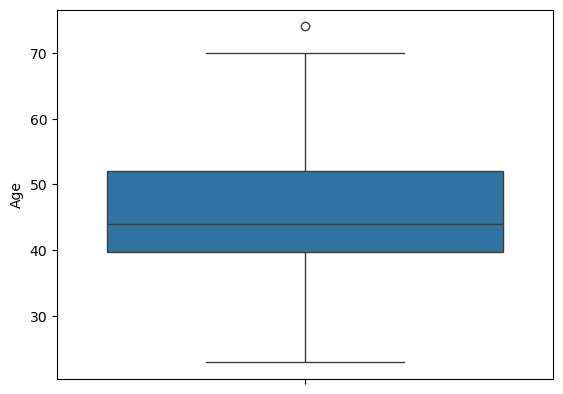

In [14]:
import seaborn as sns
sns.boxplot(data=bf,y="Age")

<Axes: >

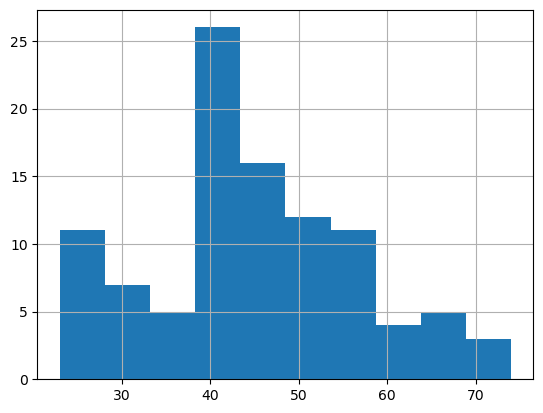

In [15]:
bf.Age.hist()

<Axes: xlabel='Age', ylabel='Density'>

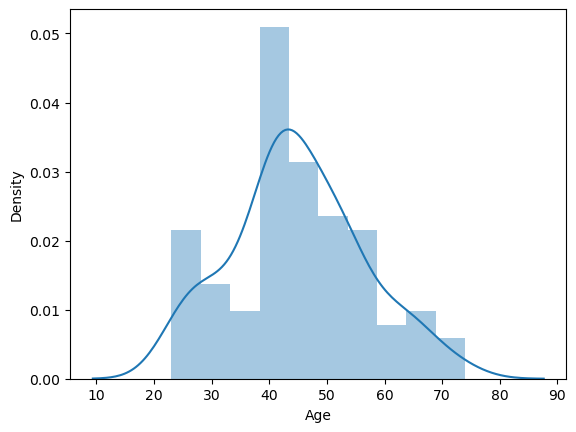

In [16]:
sns.distplot(bf.Age)# no skewness has found to treat.

In [17]:
ub=bf["Age"].mean()+3*bf["Age"].std()
lb=bf["Age"].mean()-3*bf["Age"].std()
print(ub,lb)

79.13381199755199 10.626188002448025


In [18]:
bf["Age"].describe()

count    100.000000
mean      44.880000
std       11.417937
min       23.000000
25%       39.750000
50%       44.000000
75%       52.000000
max       74.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

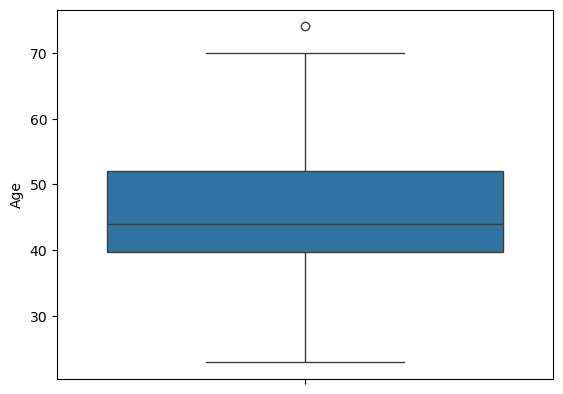

In [19]:
bf.loc[bf["Age"]>ub,"Age"]=ub
sns.boxplot(data=bf,y="Age")

In [20]:
l2=bf["Weight"]
l2

0     247.25
1     177.25
2     156.25
3     154.25
4     177.00
       ...  
95    177.25
96    187.75
97    184.25
98    223.00
99    127.50
Name: Weight, Length: 100, dtype: float64

In [21]:
outliers=[]
def detect_outlier(l2):
 threshold=3
 mean=np.mean(l2)
 std=np.std(l2)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l2)

<Axes: ylabel='Weight'>

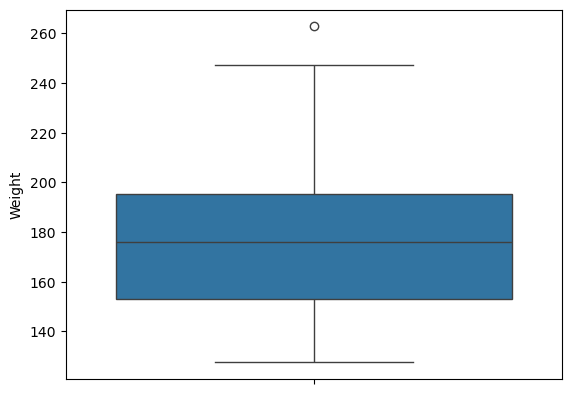

In [22]:
import seaborn as sns
sns.boxplot(data=bf,y="Weight")

<Axes: >

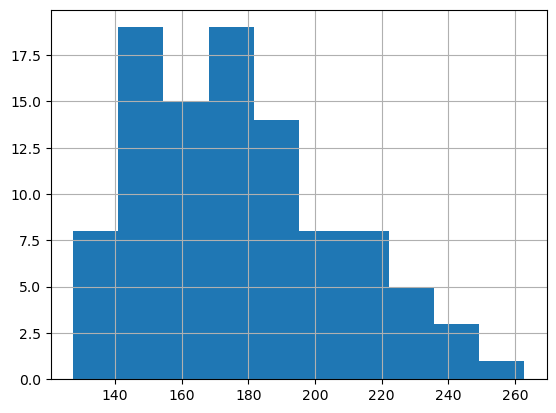

In [23]:
bf.Weight.hist()

<Axes: xlabel='Age', ylabel='Density'>

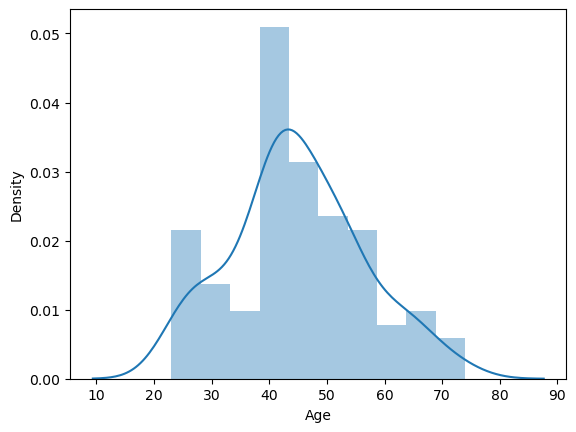

In [24]:
sns.distplot(bf.Age)# no skewness has found to treat.

In [25]:
ub=bf["Weight"].mean()+3*bf["Weight"].std()
lb=bf["Weight"].mean()-3*bf["Weight"].std()
print(ub,lb)

265.97554001944127 88.92745998055877


In [26]:
bf["Weight"].describe()

count    100.000000
mean     177.451500
std       29.508013
min      127.500000
25%      152.937500
50%      176.125000
75%      195.437500
max      262.750000
Name: Weight, dtype: float64

<Axes: ylabel='Weight'>

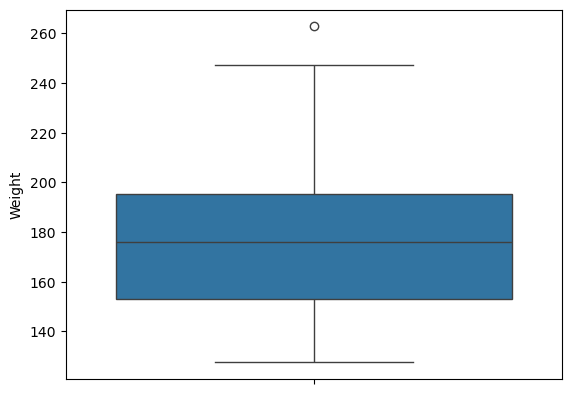

In [27]:
bf.loc[bf["Weight"]>ub,"Weight"]=ub
sns.boxplot(data=bf,y="Weight")

<Axes: ylabel='Height'>

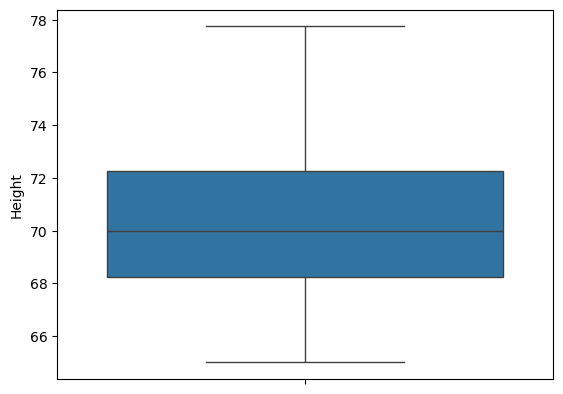

In [28]:
import seaborn as sns
sns.boxplot(data=bf,y="Height")#no outlier has found to treat.

<Axes: xlabel='Height', ylabel='Density'>

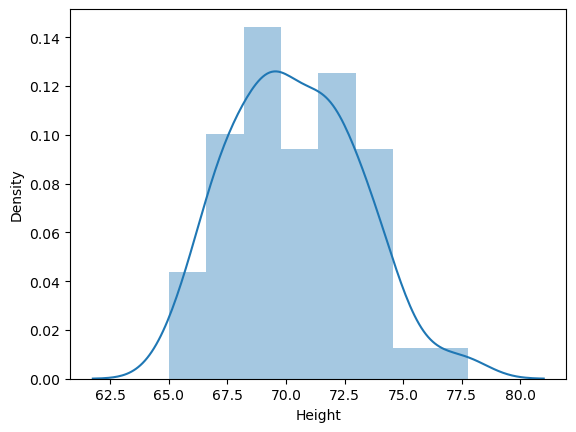

In [29]:
sns.distplot(bf.Height)# no skewness has found to treat.

<Axes: ylabel='Neck'>

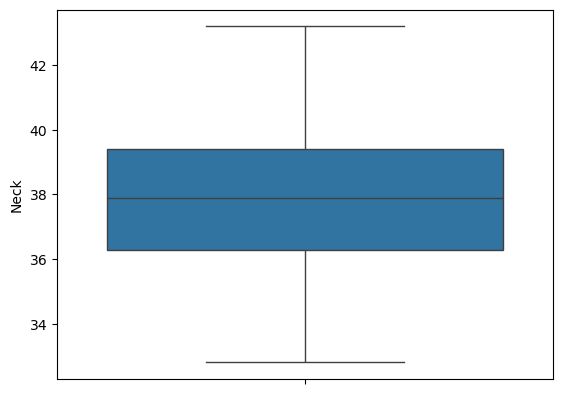

In [30]:
import seaborn as sns
sns.boxplot(data=bf,y="Neck")#no outlier has found to treat.

<Axes: xlabel='Neck', ylabel='Density'>

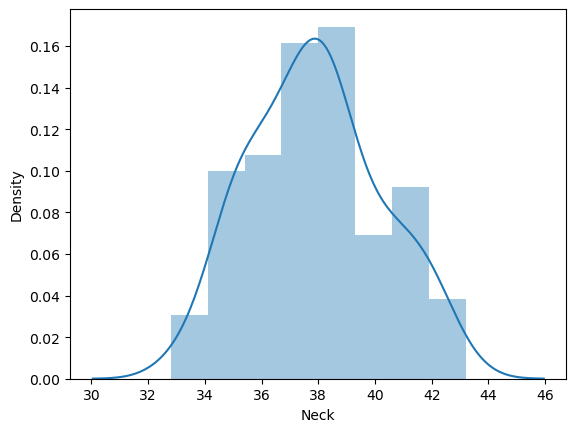

In [31]:
sns.distplot(bf.Neck)# no skewness has found to treat.

<Axes: ylabel='Chest'>

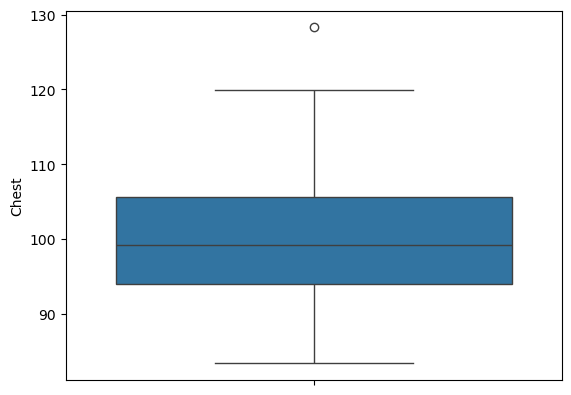

In [32]:
import seaborn as sns
sns.boxplot(data=bf,y="Chest")

<Axes: xlabel='Chest', ylabel='Density'>

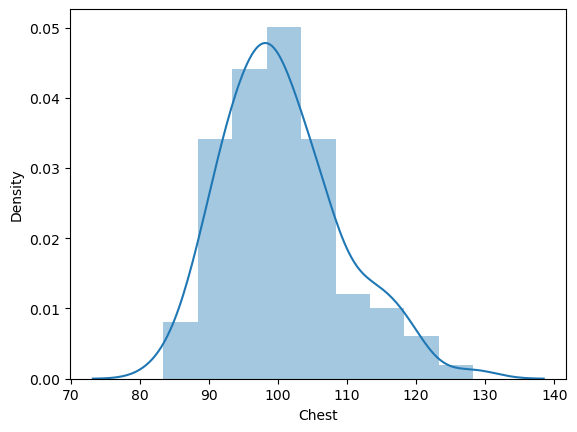

In [33]:
sns.distplot(bf.Chest)

In [34]:
l3=bf["Chest"]
l3

0     117.0
1     101.1
2      97.8
3      93.1
4      99.7
      ...  
95     96.0
96     97.8
97     98.9
98    114.1
99     83.4
Name: Chest, Length: 100, dtype: float64

In [35]:
outliers=[]
def detect_outlier(l3):
 threshold=3
 mean=np.mean(l3)
 std=np.std(l3)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l3)

In [36]:
ub=bf["Chest"].mean()+3*bf["Chest"].std()
lb=bf["Chest"].mean()-3*bf["Chest"].std()
print(ub,lb)

126.23047766767274 75.1315223323272


In [37]:
bf["Chest"].describe()

count    100.000000
mean     100.681000
std        8.516493
min       83.400000
25%       94.000000
50%       99.250000
75%      105.600000
max      128.300000
Name: Chest, dtype: float64

<Axes: ylabel='Chest'>

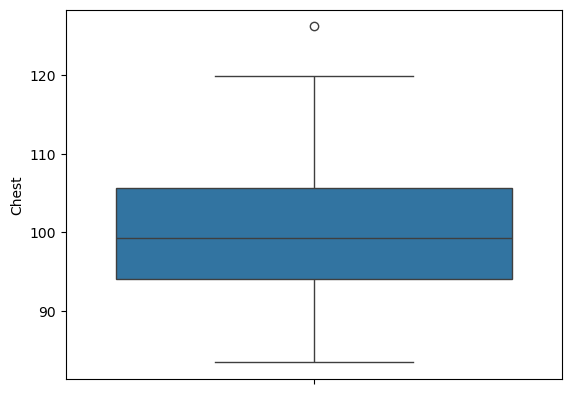

In [38]:
bf.loc[bf["Chest"]>ub,"Chest"]=ub
sns.boxplot(data=bf,y="Chest")

In [39]:
#skewness treatment::
bf.Chest.skew()

0.6253126256461117

In [40]:
import numpy as np
np.log(0)

-inf

In [41]:
bf.shape

(100, 10)

In [42]:
bf_new=bf[bf.Chest>0]

In [43]:
bf_new.shape

(100, 10)

In [44]:
IQR=bf.Chest.quantile(0.75)-bf.Chest.quantile(0.25)
L1=bf["Chest"].quantile(0.25)-(IQR*3)
U1=bf["Chest"].quantile(0.75)+(IQR*3)
print(L1,U1)

59.20000000000002 140.39999999999998


In [45]:
bf["Chest"]=np.log(bf["Chest"])
bf.Chest.skew()

0.4145911854496069

<Axes: xlabel='Chest', ylabel='Density'>

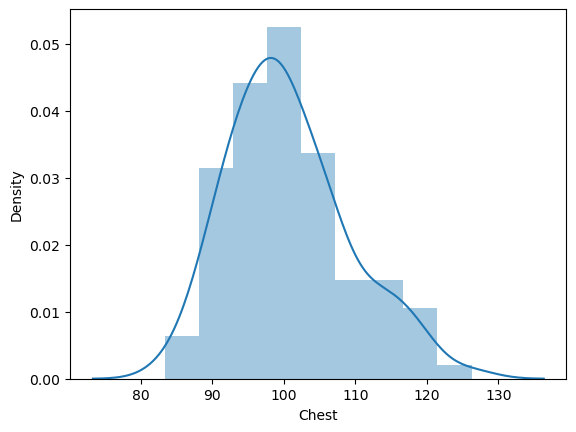

In [46]:
sns.distplot(bf_new.Chest)

<Axes: ylabel='Abdomen'>

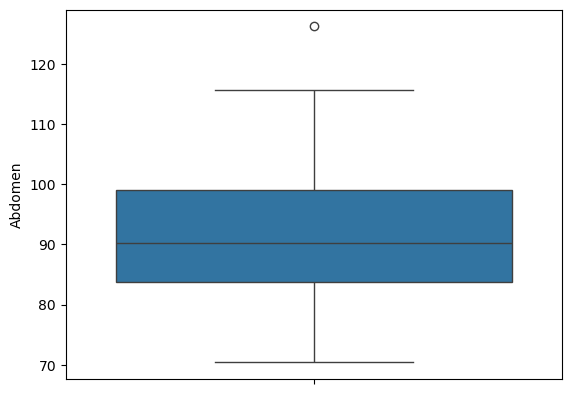

In [47]:
import seaborn as sns
sns.boxplot(data=bf,y="Abdomen")

<Axes: xlabel='Abdomen', ylabel='Density'>

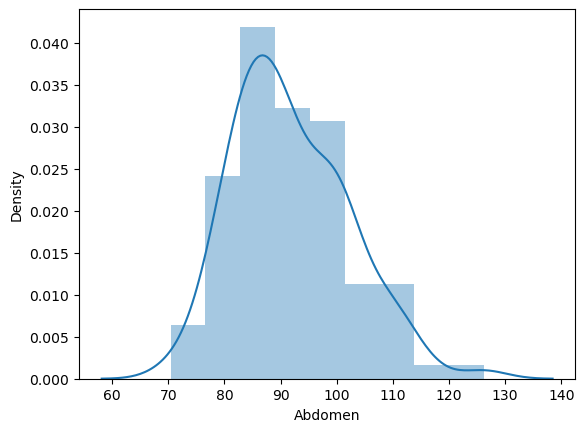

In [48]:
sns.distplot(bf.Abdomen)

In [49]:
l4=bf["Abdomen"]
l4

0     115.6
1      92.4
2      86.0
3      85.2
4      95.6
      ...  
95     90.0
96     98.6
97     92.1
98    106.8
99     70.4
Name: Abdomen, Length: 100, dtype: float64

In [50]:
outliers=[]
def detect_outlier(l4):
 threshold=3
 mean=np.mean(l4)
 std=np.std(l4)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l4)

In [51]:
ub=bf["Abdomen"].mean()+3*bf["Abdomen"].std()
lb=bf["Abdomen"].mean()-3*bf["Abdomen"].std()
print(ub,lb)

122.65070451450512 61.08329548549485


In [52]:
bf["Abdomen"].describe()

count    100.000000
mean      91.867000
std       10.261235
min       70.400000
25%       83.825000
50%       90.150000
75%       98.975000
max      126.200000
Name: Abdomen, dtype: float64

<Axes: ylabel='Abdomen'>

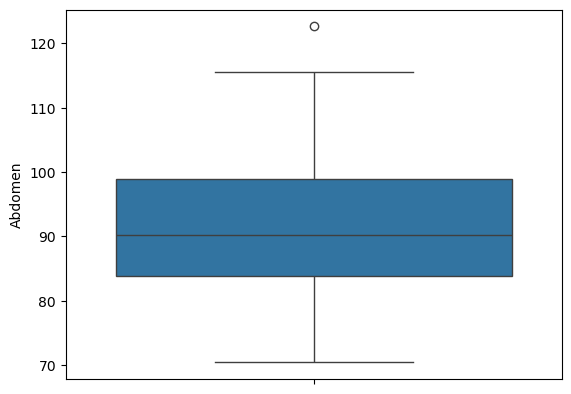

In [53]:
bf.loc[bf["Abdomen"]>ub,"Abdomen"]=ub
sns.boxplot(data=bf,y="Abdomen")

skewness treatment::

In [ ]:
bf.Abdomen.skew()

In [ ]:
import numpy as np
np.log(0)

In [ ]:
bf.shape

In [ ]:
bf_new=bf[bf.Abdomen>0]

In [ ]:
bf_new.shape

In [ ]:
bf["Abdomen"]=np.log(bf["Abdomen"])
bf.Abdomen.skew()

In [ ]:
sns.distplot(bf_new.Abdomen)

In [ ]:
IQR=bf.Abdomen.quantile(0.75)-bf.Abdomen.quantile(0.25)
L1=bf["Abdomen"].quantile(0.25)-(IQR*3)
U1=bf["Abdomen"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bf.loc[bf["Abdomen"]>U1,"Abdomen"]=U1
sns.distplot(bf.Abdomen)

In [ ]:
import seaborn as sns
sns.boxplot(data=bf,y="Ankle")

In [ ]:
sns.distplot(bf.Ankle)

In [ ]:
l5=bf["Ankle"]
l5

In [ ]:
outliers=[]
def detect_outlier(l5):
 threshold=3
 mean=np.mean(l5)
 std=np.std(l5)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l5)

In [ ]:
ub=bf["Ankle"].mean()+3*bf["Ankle"].std()
lb=bf["Ankle"].mean()-3*bf["Ankle"].std()
print(ub,lb)

In [ ]:
bf["Ankle"].describe()

In [ ]:
bf.loc[bf["Ankle"]>ub,"Ankle"]=ub
sns.boxplot(data=bf,y="Ankle")

skewness treatment::

In [ ]:
bf.Ankle.skew()

In [ ]:
import numpy as np
np.log(0)

In [ ]:
bf_new=bf[bf.Ankle>0]

In [ ]:
bf["Ankle"]=np.log(bf["Ankle"])
bf.Ankle.skew()

In [ ]:
IQR=bf.Ankle.quantile(0.75)-bf.Ankle.quantile(0.25)
L1=bf["Ankle"].quantile(0.25)-(IQR*3)
U1=bf["Ankle"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bf.loc[bf["Ankle"]>U1,"Ankle"]=U1
sns.distplot(bf.Ankle)

In [ ]:
import seaborn as sns
sns.boxplot(data=bf,y="Biceps")#no outlier is prtesent to treat.

In [ ]:
sns.distplot(bf.Biceps)#no skewness is present to treat.

In [ ]:
import seaborn as sns
sns.boxplot(data=bf,y="Wrist")

In [ ]:
sns.distplot(bf.Wrist)

In [ ]:
l6=bf["Wrist"]
l6

In [ ]:
outliers=[]
def detect_outlier(l6):
 threshold=3
 mean=np.mean(l6)
 std=np.std(l6)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l6)

In [ ]:
ub=bf["Wrist"].mean()+3*bf["Wrist"].std()
lb=bf["Wrist"].mean()-3*bf["Wrist"].std()
print(ub,lb)

In [ ]:
bf["Wrist"].describe()

In [ ]:
bf.loc[bf["Wrist"]>ub,"Wrist"]=ub
sns.boxplot(data=bf,y="Wrist")

skewness treatment::

In [ ]:
bf.Wrist.skew()

In [ ]:
import numpy as np
np.log(0)

In [ ]:
bf_new=bf[bf.Wrist>0]

In [ ]:
bf["Wrist"]=np.log(bf["Wrist"])
bf.Wrist.skew()

In [ ]:
IQR=bf.Wrist.quantile(0.75)-bf.Wrist.quantile(0.25)
L1=bf["Wrist"].quantile(0.25)-(IQR*3)
U1=bf["Wrist"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bf.loc[bf["Wrist"]>U1,"Wrist"]=U1
sns.distplot(bf.Wrist)

In [ ]:
data1=bf.corr()
data1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data1)
plt.show()

Model Building ::

In [112]:
x=bf.iloc[:,1:]

In [114]:
x.head()
x.shape

(100, 9)

In [116]:
y=bf.iloc[:,0]

In [118]:
y.head()
y.shape

(100,)

In [122]:
import sklearn
from sklearn.model_selection import train_test_split

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=120)

In [126]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((70, 9), (30, 9), (70,), (30,))

In [128]:
from sklearn import linear_model
linear=linear_model.LinearRegression()

In [130]:
linear.fit(x_train,y_train)

LinearRegression()

In [132]:
pred=linear.predict(x_test)
pred

array([13.96772588, 16.46053625, 22.90622677, 16.33606215,  8.50018576,
       15.02155691, 16.435472  , 27.72231758, 15.54500112, 16.64084632,
       22.4928635 , 16.52696289, 14.28177168, 24.71303817, 16.68470937,
       16.30235858, 19.91096143, 33.75858128,  9.69776208, 13.52186139,
       25.87692568,  7.41607325, 17.61448959, 21.5334438 , 22.89196604,
       21.21405789, 16.63017211, 17.00308429, 17.90167709, 39.36808271])

In [134]:
linear.coef_

array([ 0.05141374, -0.1467078 ,  0.02796953,  0.27634098, -8.54185119,
        1.04981999,  1.191874  ,  0.18437632, -2.27480802])

In [136]:
linear.intercept_

-18.727874294207428

In [138]:
R2=linear.score(x_train,y_train)
R2

0.7807432805836124

In [140]:
Adj_R2=1-(((1-R2)*(70-1))/(70-9-1))
Adj_R2

0.7478547726711543

In [142]:
pred_train=linear.predict(x_train)
pred_train

array([19.90692176, 18.84113893, 14.35971408, 20.69778133, 27.21852538,
       29.42784925, 27.68057139, 15.58010085, 25.30745277, 10.91231524,
       13.71514337,  7.91575885, 20.30325062, 18.28222508, 22.87781923,
        9.91426346, 23.2285209 , 14.95358922, 19.51195757, 26.40790421,
       15.92600122, 16.07314459, 19.3585475 , 23.94417352, 12.60256854,
       15.0914067 ,  9.90937439,  8.78138273, 26.41069483, 15.65116689,
       19.29522081,  5.19361928, 15.93640434, 28.95509739,  4.39235761,
       22.96142422, 14.70755934,  8.87683945, 26.47401199, 11.27954713,
       30.41774609, 20.98225322, 13.35424416,  9.95936793, 17.90777648,
       25.18255544, 36.06811045, 16.03187241, 18.16212828, 11.77814142,
       21.09177674, 18.71984121, 15.1042139 ,  9.33934585, 20.7479555 ,
        6.63086685, 23.87034128, 16.16520085, 24.87070028, 13.08666799,
       15.76312366, 17.23398455, 17.05335079, 24.20933793, 35.21346373,
       27.30550847, 16.94952902, 27.43749683, 34.88751577, 23.41

In [144]:
pred_train.shape

(70,)

In [146]:
mean_y=y_train.mean()
mean_y

18.82571428571428

In [148]:
SSE=np.sum(np.square(pred_train-y_train))
SSE

1006.0580788570006

In [150]:
SSR=np.sum(np.square(pred_train-mean_y))
SSR

3582.4356354287283

In [152]:
Rsq=SSR/(SSR+SSE)
Rsq

0.7807432805836132

In [154]:
from sklearn import metrics
#MAE-Mean Absolute Error
MAE=metrics.mean_absolute_error(pred,y_test)
MAE

3.6239706238503535

In [156]:
#MSE=Mean Squared Error
MSE=metrics.mean_squared_error(pred,y_test)
MSE

20.296428447927614

In [ ]:
RMSE=np.sqrt(MSE)
RMSE

In [ ]:
#MAPE
error=pred-y_test
error
error_abs=np.abs(error)
error_abs

In [ ]:
MAPE=np.mean(error_abs/y_test)*100
MAPE

In [ ]:
Accuracy=(100-MAPE)
Accuracy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(pred,y_test)
plt.show()

In [ ]:
from scipy import stats
slope,intercepts,r,p,std_err=stats.linregress(pred,y_test)
def myfunc(y_test):
 return slope*y_test+intercepts
mymodel=list(map(myfunc,y_test))

#Lasso-L1::

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
Lasso()
bf.head(1)

In [ ]:
lasso.coef_

In [ ]:
#y(bf)=B0+X1.Age+X2.Weight+X3.Height+X4.Neck+X5.Chest+X6.Abdomen+X7.Ankle+X8.Biceps+X9.Wrist
#lungcap,age,height--data(LR)---R2,Adj_R2

In [ ]:
l1_pred=lasso.predict(x_test)
l1_pred

In [ ]:
l1_R2=lasso.score(x_train,y_train)
l1_R2

In [ ]:
l1_adj_R2=1-(((1-l1_R2)*(580-1))/(580-5-1))
l1_adj_R2

In [ ]:
df=pd.DataFrame({"Feature_importances":lasso.coef_,"columns":list(x)})
df

In [ ]:
df2=pd.DataFrame({"Actual":y_test,"Predictions":l1_pred})
df2

In [ ]:
MSE_l1=metrics.mean_squared_error(l1_pred,y_test)
MSE_l1

In [ ]:
sns.lmplot(x="Actual",y="Predictions",data=df2,fit_reg=False)
d_line=np.arange(df2.min().min(),df2.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

Ridge (L2)::

In [ ]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(x_train,y_train)
Ridge()

In [ ]:
rd_pred=rd.predict(x_test)
rd_pred

In [ ]:
list(rd.coef_)

In [ ]:
rd_R2=rd.score(x_train,y_train)
rd_R2

In [158]:
rd_adj_R2=1-(((1-rd_R2)*(70-1))/(70-9-1))
rd_adj_R2

NameError: name 'rd_R2' is not defined

In [ ]:
df_1=pd.DataFrame({"Feature_importances":rd.coef_,"columns":list(x)})
df_1

In [ ]:
df_2=pd.DataFrame({"Actual":y_test,"Predictions":rd_pred})
df_2

In [ ]:
MSE_rd=metrics.mean_squared_error(rd_pred,y_test)
MSE_rd

In [ ]:
sns.lmplot(x="Actual",y="Predictions",data=df_2,fit_reg=False)
d_line=np.arange(df_2.min().min(),df_2.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

Feature Selection::

In [ ]:
df

In [ ]:
bf.shape

In [ ]:
l_new=bf.drop(["Neck","Chest","Abdomen","Ankle","Biceps","Wrist"],axis=1)
l_new.shape

In [ ]:
l_new.isnull().sum()
l_new.dtypes

In [ ]:
x1=l_new.iloc[:,1:]
x1.head()
y1=l_new.iloc[:,0]
y1.head()

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3
,random_state=120)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

In [ ]:
linear.fit(x1_train,y1_train)
LinearRegression()

In [ ]:
linear_new_pred=linear.predict(x1_test)
linear_new_pred

In [ ]:
new_R2=linear.score(x1_train,y1_train)
new_R2

In [160]:
Adjnew_R2=1-(((1-new_R2)*(70-1))/(70-9-1))
Adjnew_R2

NameError: name 'new_R2' is not defined

In [ ]:
new_MSE=metrics.mean_squared_error(linear_new_pred,y1_test)
new_MSE

In [ ]:
df_new=pd.DataFrame({"Actual_n":y1_test,"Predictions_n":linear_new_pred})
df_new

In [ ]:
sns.lmplot(x="Actual_n",y="Predictions_n",data=df_new,fit_reg=False)
d_line=np.arange(df_new.min().min(),df_new.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

Final Result::

In [ ]:
list1=["Linear Regression","Lasso","Ridge","Feature_SelectionModel"]
list2=[R2,l1_R2,rd_R2,new_R2]
list3=[Adj_R2,l1_adj_R2,rd_adj_R2,Adjnew_R2]
list4=[MSE,MSE_l1,MSE_rd,new_MSE]

In [ ]:
Final_Result=pd.DataFrame({"Model_Name":list1,"R2_value":list2,"Adj_R2":list3,"MSE":list4})
Final_Result

In [ ]:
Final result::Linear regression model is better fitted model for lung capacity dataset .